In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Database/diabetes_data.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
df.isnull().sum()

,0
Age,25
Gender,16
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [6]:
median_value  = df['Age'].median()
df['Age'] = df['Age'].fillna(median_value)

In [7]:
mode_value = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_value)

In [8]:
mode_value = df['muscle stiffness'].mode()[0]
df['muscle stiffness'] = df['muscle stiffness'].fillna(mode_value)

In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [11]:
df_copy = df.copy()

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,335
Female,185


In [14]:
# Define the mapping dictionary
gender_mapping = {
    'Male': 1,
    'Female': 2,
}

# Apply the mapping
df['Gender'] = df['Gender'].map(gender_mapping)

In [15]:
df['Polyuria'].value_counts()

,count
Polyuria,
No,262
Yes,258


In [16]:
# Define the mapping dictionary
Polyuria_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Polyuria'] = df['Polyuria'].map(Polyuria_mapping)

In [17]:
df['Polydipsia'].value_counts()

,count
Polydipsia,
No,287
Yes,233


In [18]:
# Define the mapping dictionary
Polydipsia_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Polydipsia'] = df['Polydipsia'].map(Polydipsia_mapping)

In [19]:
df['sudden weight loss'].value_counts()

,count
sudden weight loss,
No,303
Yes,217


In [20]:
# Define the mapping dictionary
sudden_weight_loss_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['sudden weight loss'] = df['sudden weight loss'].map(sudden_weight_loss_mapping)

In [21]:
df['weakness'].value_counts()

,count
weakness,
Yes,305
No,215


In [22]:
# Define the mapping dictionary
weakness_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['weakness'] = df['weakness'].map(weakness_mapping)

In [23]:
df['Polyphagia'].value_counts()

,count
Polyphagia,
No,283
Yes,237


In [24]:
# Define the mapping dictionary
Polyphagia_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Polyphagia'] = df['Polyphagia'].map(Polyphagia_mapping)


In [25]:
df['Genital thrush'].value_counts()

,count
Genital thrush,
No,404
Yes,116


In [26]:
# Define the mapping dictionary
Genital_thrush_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Genital thrush'] = df['Genital thrush'].map(Genital_thrush_mapping)

In [27]:
df['visual blurring'].value_counts()

,count
visual blurring,
No,287
Yes,233


In [28]:
# Define the mapping dictionary
visual_blurring_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['visual blurring'] = df['visual blurring'].map(visual_blurring_mapping)

In [29]:
df['Itching'].value_counts()

,count
Itching,
No,267
Yes,253


In [30]:
# Define the mapping dictionary
Itching_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Itching'] = df['Itching'].map(Itching_mapping)

In [31]:
df['Irritability'].value_counts()

,count
Irritability,
No,394
Yes,126


In [32]:
# Define the mapping dictionary
Irritability_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Irritability'] = df['Irritability'].map(Irritability_mapping)

In [33]:
df['delayed healing'].value_counts()

,count
delayed healing,
No,281
Yes,239


In [34]:
# Define the mapping dictionary
delayed_healing_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['delayed healing'] = df['delayed healing'].map(delayed_healing_mapping)

In [35]:
df['partial paresis'].value_counts()

,count
partial paresis,
No,296
Yes,224


In [36]:
# Define the mapping dictionary
partial_paresis_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['partial paresis'] = df['partial paresis'].map(partial_paresis_mapping)

In [37]:
df['muscle stiffness'].value_counts()

,count
muscle stiffness,
No,335
Yes,185


In [38]:
# Define the mapping dictionary
muscle_stiffness_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['muscle stiffness'] = df['muscle stiffness'].map(muscle_stiffness_mapping)

In [39]:
df['Alopecia'].value_counts()

,count
Alopecia,
No,341
Yes,179


In [40]:
# Define the mapping dictionary
Alopecia_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Alopecia'] = df['Alopecia'].map(Alopecia_mapping)

In [41]:
df['Obesity'].value_counts()

,count
Obesity,
No,432
Yes,88


In [42]:
# Define the mapping dictionary
Obesity_mapping = {
    'Yes': 1,
    'No': 2,
}

# Apply the mapping
df['Obesity'] = df['Obesity'].map(Obesity_mapping)

In [43]:
df['class'].value_counts()

,count
class,
Positive,320
Negative,200


In [44]:
# Define the mapping dictionary
class_mapping = {
    'Positive': 1,
    'Negative': 2,
}

# Apply the mapping
df['class'] = df['class'].map(class_mapping)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [46]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,2,1,2,1,2,2,2,1,2,1,2,1,1,1,1
1,58.0,1,2,2,2,1,2,2,1,2,2,2,1,2,1,2,1
2,41.0,1,1,2,2,1,1,2,2,1,2,1,2,1,1,2,1
3,45.0,1,2,2,1,1,1,1,2,1,2,1,2,2,2,2,1
4,60.0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,2,1,2,2,1,2,1,1,2,2,2,1
516,48.0,2,1,1,1,1,1,2,2,1,1,1,1,2,2,2,1
517,58.0,2,1,1,1,1,1,2,1,2,2,2,1,1,2,1,1
518,32.0,2,2,2,2,1,2,2,1,1,2,1,2,2,1,2,2


In [47]:
correlation = df.corr()
correlation

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,-0.062779,-0.195348,-0.135812,-0.062001,-0.230196,-0.309755,-0.099202,-0.411362,-0.296996,-0.209496,-0.257802,-0.234989,-0.325888,-0.319525,-0.128467,-0.103745
Gender,-0.062779,1.000000,-0.250755,-0.291644,-0.259027,-0.118197,-0.207142,0.195575,-0.210869,-0.056180,-0.010997,-0.096489,-0.310750,-0.093828,0.310136,-0.007417,-0.430617
Polyuria,-0.195348,-0.250755,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.130244,-0.144192,0.126567,0.665922
Polydipsia,-0.135812,-0.291644,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.178559,-0.310964,0.098691,0.648734
sudden weight loss,-0.062001,-0.259027,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.096107,-0.202727,0.169294,0.436568
weakness,-0.230196,-0.118197,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.265021,0.090490,0.045665,0.243275
Polyphagia,-0.309755,-0.207142,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.311993,-0.053498,0.029785,0.342504
Genital thrush,-0.099202,0.195575,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.108735,0.204847,0.053828,0.110288
visual blurring,-0.411362,-0.210869,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.428961,0.014604,0.109005,0.251300
Itching,-0.296996,-0.056180,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.224951,0.266506,0.001894,-0.013384


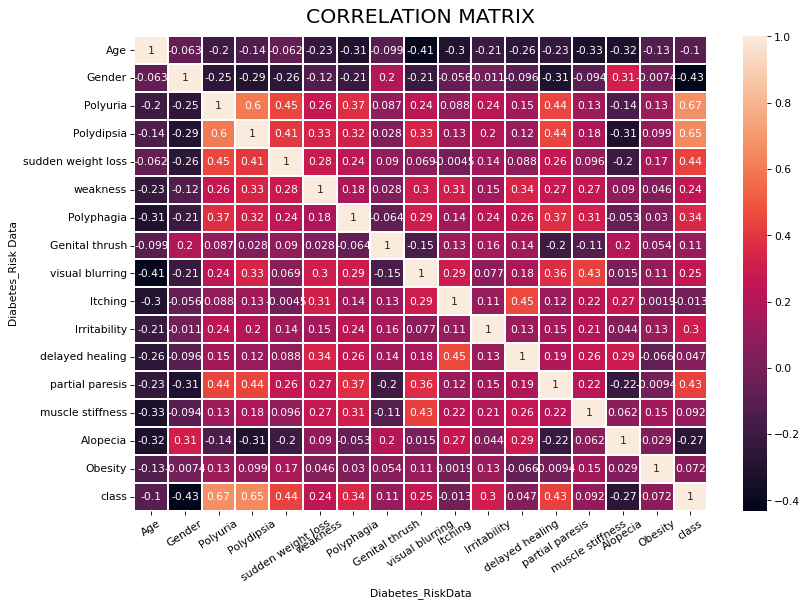

In [48]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Diabetes_RiskData')
plt.ylabel('Diabetes_Risk Data')
plt.xticks(rotation=33)
plt.show()

<ipython-input-49-e68acadc3dac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_copy, palette='viridis')


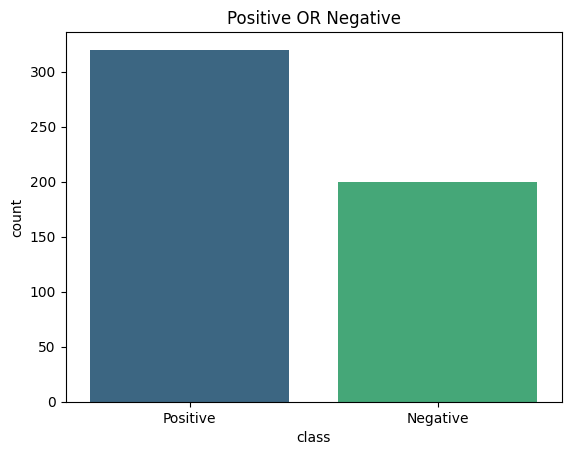

In [49]:
sns.countplot(x='class', data=df_copy, palette='viridis')
plt.title('Positive OR Negative')
plt.show()

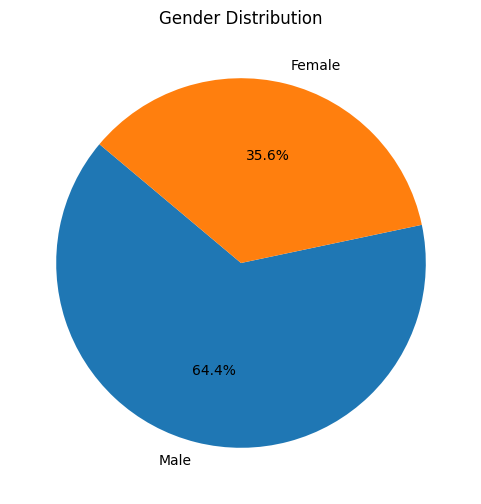

In [50]:
# Counting the number of males and females
gender_counts = df_copy['Gender'].value_counts()
gender_counts

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

In [51]:
X=df.drop(columns=['class'])
Y=df['class']

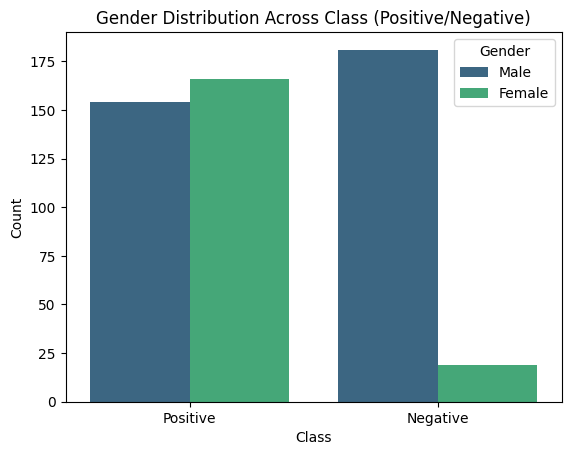

In [63]:
# Count plot for Gender vs. Class
sns.countplot(x='class', hue='Gender', data=df_copy, palette='viridis')
plt.title('Gender Distribution Across Class (Positive/Negative)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<ipython-input-67-9ec4513da580>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_copy, x='class', y='Age', palette='viridis')


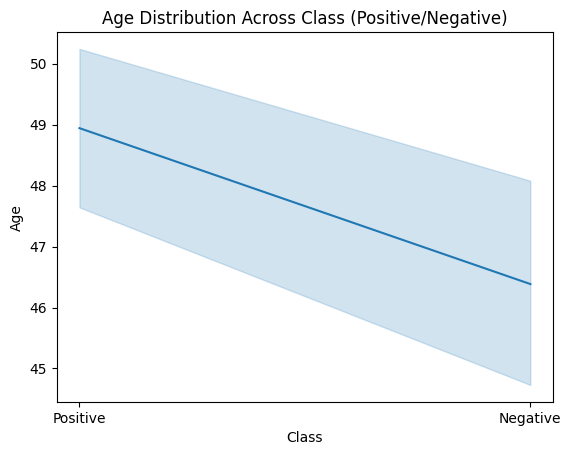

In [67]:
# Line plot for Age vs Class
sns.lineplot(data=df_copy, x='class', y='Age', palette='viridis')
plt.title('Age Distribution Across Class (Positive/Negative)')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred = model.predict(X_test)

print(y_pred)

[2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1
 2 2 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2]


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9326923076923077
Precision: 0.9444444444444444
Recall (Sensitivity): 0.9577464788732394
F1-Score: 0.951048951048951


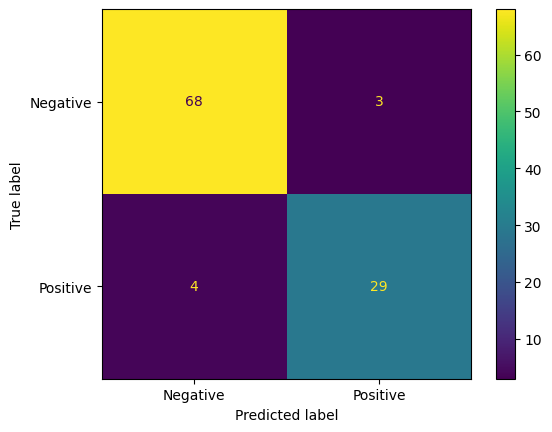

In [57]:
#confuison matrix for titanic dataset
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

# SVM

In [58]:
from sklearn.svm import SVC

In [59]:
# Initialize the SVM model (with a linear kernel)
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[2 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1
 2 2 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2]


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8942307692307693
Precision: 0.9285714285714286
Recall (Sensitivity): 0.9154929577464789
F1-Score: 0.9219858156028369


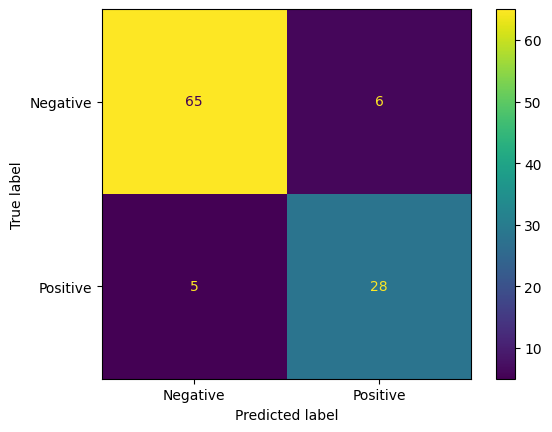

In [62]:
#confuison matrix for titanic dataset
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()